In [1]:
import networkx as nx
import graphviz as gv
from networkx.algorithms import is_tree
from math import inf
from random import randint

def check_matrix(adjacency_matrix):
    vertices_count = len(adjacency_matrix)
    try:
        for row in adjacency_matrix:
            assert len(row) == vertices_count
    except AssertionError:
        print("The matrix must be n*n")

def create_graph_adjacency_matrix(adjacency_matrix):
    """
    I tried to use NX graphs and they were ugly, and tried also to convert nx to gv.
    The simplest option is to have an edge list for computation and a graph for vis.
    """
    origin_vertices_count = len(adjacency_matrix)
    edge_list = []
    gv_graph = gv.Graph()

    for i in range(origin_vertices_count):
        gv_graph.node(str(i))

    for i, origin in enumerate(adjacency_matrix):
        for j, weight in enumerate(origin):
            if weight != 0:
                edge_list.append((i, j, weight))
                gv_graph.edge(str(i), str(j), str(weight))

    return edge_list, gv_graph

def edge_in_edge_list(edge_to_find, edge_list):
    for edge_to_check in edge_list:
        if edge_to_find[0] == edge_to_check[0] and edge_to_find[1] == edge_to_check[1]:
            return True
    return False

def plot_MST(MST_edge_list, other_edge_list):
    MST_graph = gv.Graph()

    for edge in MST_edge_list:
        MST_graph.node(str(edge[0]))
        MST_graph.node(str(edge[1]))
        MST_graph.edge(str(edge[0]), str(edge[1]), str(edge[2]), color="red")

    for edge in other_edge_list:
        MST_graph.node(str(edge[0]))
        MST_graph.node(str(edge[1]))
        MST_graph.edge(str(edge[0]), str(edge[1]), str(edge[2]), color="black")

    return MST_graph

def check_if_tree(MST, MST_edge_list, smallest_edge):
    potential_tree = nx.Graph(MST)
    potential_tree.add_node(smallest_edge[0])
    potential_tree.add_node(smallest_edge[1])
    potential_tree.add_edge(smallest_edge[0], smallest_edge[1], weight=smallest_edge[2])

    if nx.is_tree(potential_tree):
        MST_edge_list.append(smallest_edge)
        return potential_tree, MST_edge_list
    else:
        return MST, MST_edge_list
    
def get_smallest_edge(edge_list):
    smallest_weight = inf
    smallest_edge_i = None

    for i, edge in enumerate(edge_list):
        if edge[2] < smallest_weight:
            smallest_edge_i = i
            smallest_weight = edge[2]

    smallest_edge = edge_list.pop(smallest_edge_i)
    return smallest_edge, edge_list

def remove_edge(edge_to_remove, edge_list):
    if edge_to_remove in edge_list:
        edge_list.remove(edge_to_remove)
    return edge_list

def pop_random_vertex(vertices):
    random_i = randint(0, len(vertices)-1)
    vertex = vertices.pop(random_i)
    return vertex, vertices

def get_possible_new_edges(not_MST_edge_list, vertices_not_in_tree, vertices_in_tree):
    possible_edges = []
    for vertex_not_in_tree in vertices_not_in_tree:
        for vertex_in_tree in vertices_in_tree:
            for edge in not_MST_edge_list:
                if edge[0] == vertex_not_in_tree and edge[1] == vertex_in_tree:
                    possible_edges.append(edge)
                elif edge[0] == vertex_in_tree and edge[1] == vertex_not_in_tree:
                    possible_edges.append(edge)
    return possible_edges

def add_vertices_to_tree(edge, vertices_in_tree, vertices_not_in_tree):
    if edge[0] not in vertices_in_tree:
        vertices_in_tree.append(edge[0])
        vertices_not_in_tree.remove(edge[0])
    elif edge[1] not in vertices_in_tree:
        vertices_in_tree.append(edge[1])
        vertices_not_in_tree.remove(edge[1])
    return vertices_in_tree, vertices_not_in_tree

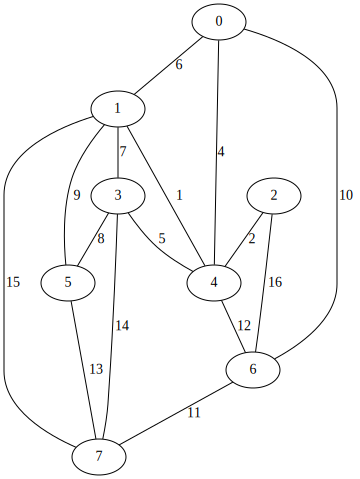

In [2]:
"""
Here we have an weighted undirected graph.
Because the first row is a vertex of paths to every other vertex, then the first elements 
of each subsequent vertices can be skipped
"""
adjacency_matrix = [
    [0,6,0,0,4,0,10,0],
    [0,0,0,7,1,9,0,15],
    [0,0,0,0,2,0,16,0],
    [0,0,0,0,5,8,0,14],
    [0,0,0,0,0,0,12,0],
    [0,0,0,0,0,0,0,13],
    [0,0,0,0,0,0,0,11],
    [0,0,0,0,0,0,0,0 ]
]

check_matrix(adjacency_matrix)
edge_list, gv_graph = create_graph_adjacency_matrix(adjacency_matrix)
gv_graph

In [3]:
"""
Minimum Spanning Tree: the path with the minimum total weight that forms a tree
"""

'\nMinimum Spanning Tree: the path with the minimum total weight that forms a tree\n'

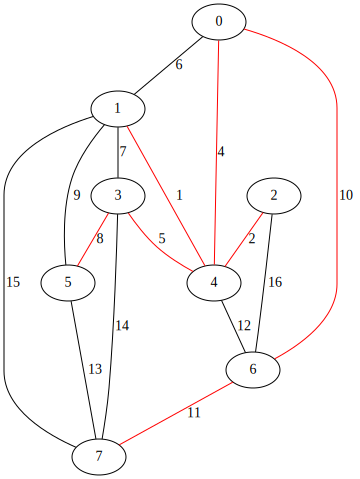

In [4]:
"""
Kruskal's Algorithm

The edge with the lowest weight must be in the MST. There is a simple proof by contradiction for this.
DO:
    Add the smallest edge provided it remains a tree, therefore, no cycles.
    Continue until all vertices are connected
"""

kruskal_edge_list = list(edge_list)
vertices_reached = set()
MST = nx.Graph()
MST_edge_list = []
not_MST_edge_list = list(edge_list)

while len(vertices_reached) < len(adjacency_matrix):
    #Could I use the not_MST_edge_list instead of kruskal_edge_list?
    smallest_edge, kruskal_edge_list = get_smallest_edge(kruskal_edge_list)
    MST, MST_edge_list = check_if_tree(MST, MST_edge_list, smallest_edge)

    vertices_reached.add(smallest_edge[0])
    vertices_reached.add(smallest_edge[1])

    if MST_edge_list[-1] == smallest_edge:
        not_MST_edge_list = remove_edge(smallest_edge, not_MST_edge_list)

MST_graph = plot_MST(MST_edge_list, not_MST_edge_list)
MST_graph

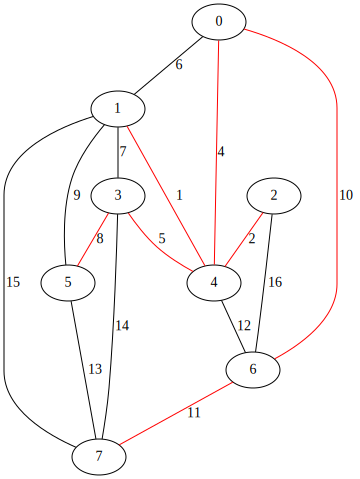

In [5]:
"""
Jarnik's Algorithm 

Choose any random vertex, this is the tree
DO:
    From the vertices not yet in the graph, check all of the edges that would connect it to the graph
    Take the smallest of those and grow the graph by one edge and one vertex

This obviously doesn't require us to check for cycles.
"""

del MST, MST_edge_list, not_MST_edge_list, MST_graph

vertices_not_in_tree = [v for v in range(0,len(adjacency_matrix))]
vertices_in_tree = []
MST = nx.Graph()
MST_edge_list = []
not_MST_edge_list = list(edge_list)

# Initialise tree with a rando vertex
first_vertex, vertices_not_in_tree = pop_random_vertex(vertices_not_in_tree)
vertices_in_tree.append(first_vertex)

while len(vertices_not_in_tree) > 0:
    possible_new_edges = get_possible_new_edges(not_MST_edge_list, vertices_not_in_tree, vertices_in_tree)
    smallest_edge, possible_new_edges = get_smallest_edge(possible_new_edges)
    MST_edge_list.append(smallest_edge)
    not_MST_edge_list.remove(smallest_edge)
    vertices_in_tree, vertices_not_in_tree = add_vertices_to_tree(smallest_edge, vertices_in_tree, vertices_not_in_tree)
    
MST_graph = plot_MST(MST_edge_list, not_MST_edge_list)
MST_graph